In [75]:
# Mengimpor library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
# Mengunggah dataset dari lokal (hanya untuk Google Colab)
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [77]:
# Membaca dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [79]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Mengisi nilai yang hilang hanya untuk kolom numerik
numerik_kolom = data.select_dtypes(include=['float64', 'int64']).columns
data[numerik_kolom] = data[numerik_kolom].fillna(data[numerik_kolom].mean())
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
# Memilih hanya kolom numerik untuk perhitungan korelasi
numerical_data = data.select_dtypes(include=['float64', 'int64'])

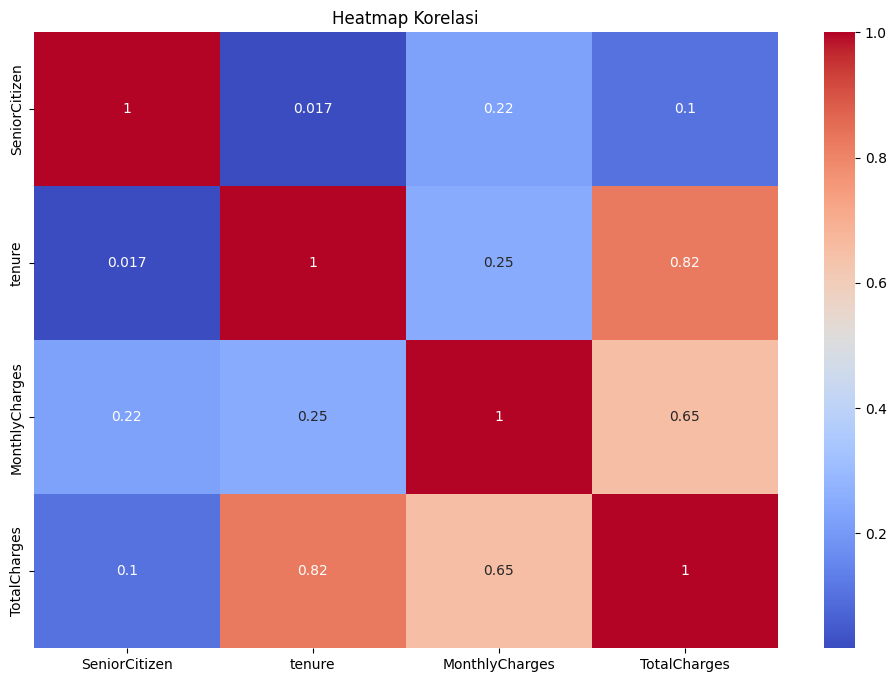

In [81]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

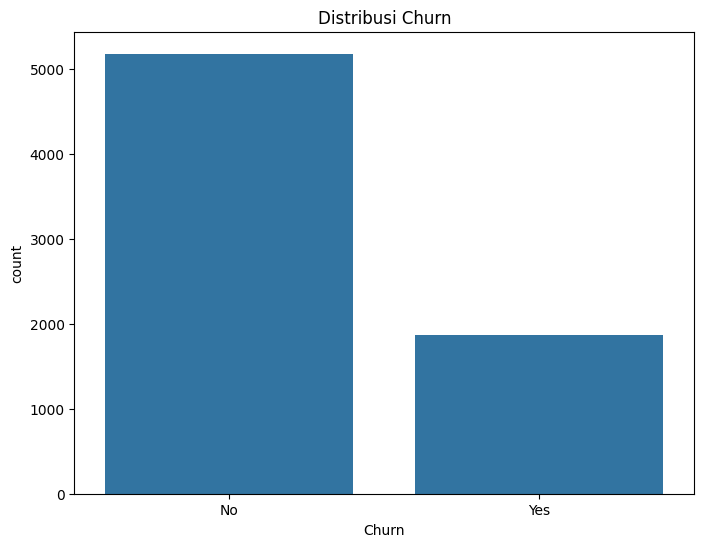

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribusi Churn')
plt.show()


In [83]:
# 1. Tenure Group
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 48:
        return '2-4 Years'
    elif tenure <= 60:
        return '4-5 Years'
    else:
        return '5+ Years'

data['TenureGroup'] = data['tenure'].apply(tenure_group)

In [84]:
# 2. Total Services
data['TotalServices'] = (data[['PhoneService', 'MultipleLines', 'InternetService',
                               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

In [85]:
# 3. Average Charges
data['AverageCharges'] = data['TotalCharges'] / (data['tenure'].replace(0, 1))

In [86]:
# Memisahkan fitur dan target
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

In [87]:
# Encoding variabel kategorikal
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

In [88]:
# Encoding variabel target
y = le.fit_transform(y)

In [89]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [91]:
# Memprediksi pada data pengujian
y_pred = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[946  90]
 [195 178]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



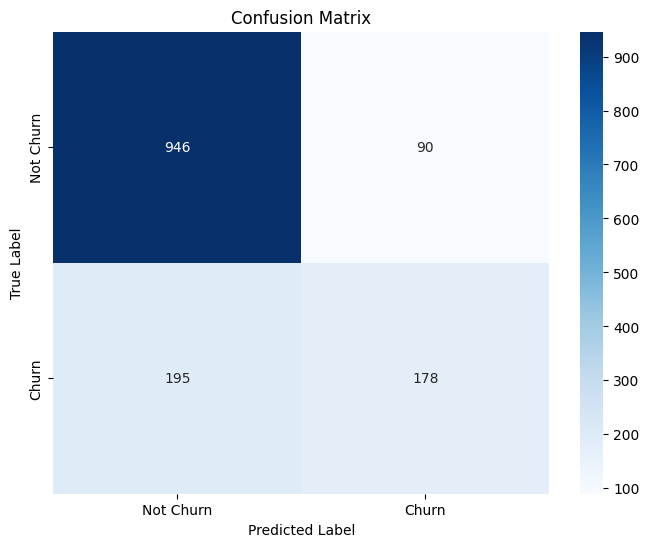

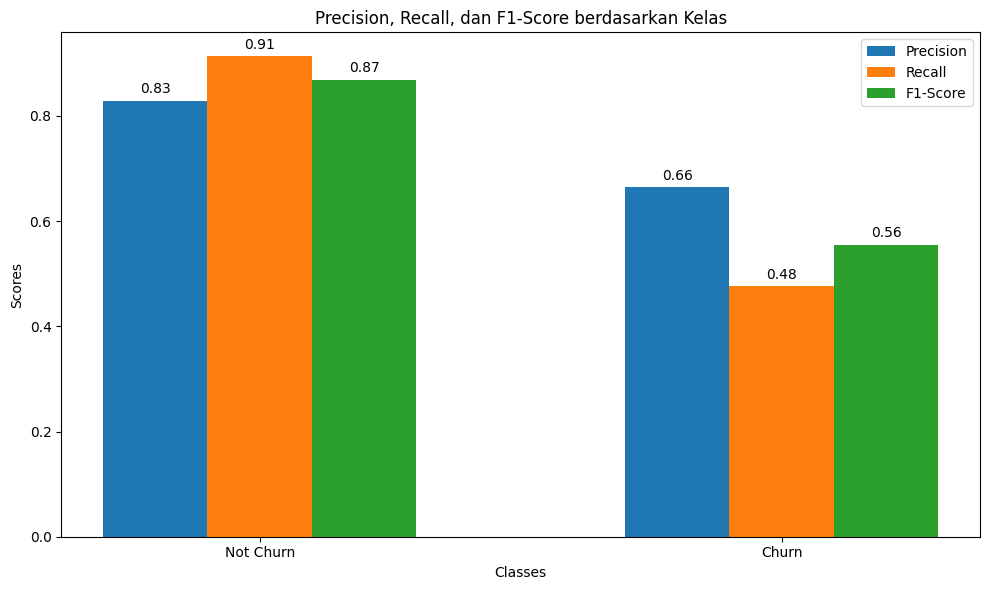

In [92]:
# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Menampilkan Confusion Matrix
class_names = ['Not Churn', 'Churn']
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False, title='Confusion Matrix')

# Generate Classification Report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Extract values for visualization
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

x = np.arange(len(class_names))  # label locations
width = 0.2  # width of the bars

# Plot Precision, Recall, and F1-Score
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, dan F1-Score berdasarkan Kelas')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

# Attach a text label above each bar in rects
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


**Ringkasan Hasil:**

- Model Random Forest berhasil melatih dan memprediksi churn pelanggan dengan akurasi keseluruhan sebesar 79%.
- Precision dan recall untuk kelas 0 (tidak churn) lebih tinggi dibandingkan dengan kelas 1 (churn), menunjukkan bahwa model lebih baik dalam memprediksi pelanggan yang tidak churn dibandingkan dengan yang churn.
- F1-Score untuk kelas 1 (churn) adalah 0.54, yang menunjukkan bahwa model masih dapat ditingkatkan untuk lebih baik memprediksi pelanggan yang churn.

**Tindakan yang Direkomendasikan:**

- Berdasarkan hasil prediksi churn, perusahaan dapat mengidentifikasi pelanggan yang berisiko tinggi untuk berhenti berlangganan dan mengambil tindakan proaktif seperti memberikan penawaran khusus atau meningkatkan layanan pelanggan.
- Menggunakan model yang lebih kompleks seperti Gradient Boosting atau menggunakan teknik oversampling/undersampling untuk menangani ketidakseimbangan kelas.
- Mengeksplorasi fitur tambahan yang dapat meningkatkan performa model.
